In [1]:
from time import perf_counter

import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

from light_dataloader import LightDataLoader, TensorDataLoader

In [2]:
# download and pre-load CIFAR10 to memory
from torchvision.datasets import CIFAR10
from torchvision.transforms import v2

loader = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32)])
cifar = list(CIFAR10(r'E:\datasets\CIFAR10', transform = loader, download=False))

time_per_batch_size: dict[str, dict[int, float]] = {}

In [3]:
images = torch.stack([i[0] for i in cifar])
labels = torch.tensor([i[1] for i in cifar])

# z-normalize
images -= images.mean()
images /= images.std()

images.shape, labels.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

# torch.utils.data.TensorDataset with torch.utils.data.DataLoader

In [4]:
from torch.utils.data import TensorDataset, DataLoader
tensor_dataset = TensorDataset(images, labels)

In [5]:
time_per_batch_size['pytorch DataLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_dataloader = DataLoader(tensor_dataset, batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in pytorch_dataloader: pass
  time_per_batch_size['pytorch DataLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['pytorch DataLoader'])

100%|██████████| 128/128 [01:53<00:00,  1.13it/s]

{1: 7.160699100000784, 9: 1.482467199995881, 17: 1.2968225000076927, 25: 1.0078899000072852, 33: 0.9412959000037517, 41: 0.9316355000191834, 49: 0.8731079999997746, 57: 0.8222140000143554, 65: 0.8188989000045694, 73: 0.832044999988284, 81: 0.8306623000244144, 89: 0.8363024999853224, 97: 0.7920899000018835, 105: 0.7738338000199292, 113: 0.7532702000171412, 121: 0.7920680000097491, 129: 0.7572716000140645, 137: 0.7819845000049099, 145: 0.7779452999820933, 153: 0.7816554000019096, 161: 0.7760499000141863, 169: 0.7292393000097945, 177: 0.9344651999999769, 185: 0.7912933000188787, 193: 0.7858368999732193, 201: 0.7844167000148445, 209: 0.7654575000051409, 217: 0.8175363000191282, 225: 0.7780702000018209, 233: 0.932959400000982, 241: 0.7777884000097401, 249: 0.7779846000194084, 257: 0.7549364999867976, 265: 0.7730794999806676, 273: 0.7662970000237692, 281: 0.7612346000096295, 289: 0.7736733999918215, 297: 0.7684163000085391, 305: 0.7699403000005987, 313: 0.770703299989691, 321: 0.928335199976

In [6]:
time_per_batch_size['pytorch DataLoader with pin_memory'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_pin_dataloader = DataLoader(tensor_dataset, batch_size = batch_size, shuffle = True, pin_memory = True)

  start = perf_counter()
  for batch in pytorch_pin_dataloader: pass
  time_per_batch_size['pytorch DataLoader with pin_memory'][batch_size] = perf_counter() - start

print(time_per_batch_size['pytorch DataLoader with pin_memory'])

100%|██████████| 128/128 [02:27<00:00,  1.15s/it]

{1: 10.985098000004655, 9: 1.7235447999846656, 17: 1.4397805999906268, 25: 1.246571399999084, 33: 1.1289956000109669, 41: 1.4318799000175204, 49: 1.2747794000024442, 57: 1.3006692999915686, 65: 1.559733200003393, 73: 1.4920767000003252, 81: 1.4760688999958802, 89: 1.380425399984233, 97: 1.1514239000098314, 105: 1.1705345000082161, 113: 1.1281896000145935, 121: 1.086228200001642, 129: 1.2453539000125602, 137: 1.0511224000074435, 145: 1.0732106999785174, 153: 0.9419890000135638, 161: 0.9527593000093475, 169: 0.8736266000196338, 177: 1.131075699988287, 185: 0.9704240999999456, 193: 0.9993739000055939, 201: 1.0554138000006787, 209: 0.9558421000256203, 217: 0.9520956000196747, 225: 0.9466465000004973, 233: 1.3043737999978475, 241: 1.090498799982015, 249: 1.1776545000029728, 257: 0.990752000012435, 265: 0.9607745999819599, 273: 0.9499614000087604, 281: 1.0748670999892056, 289: 1.0539733000041451, 297: 0.9217487999994773, 305: 1.0592861000041012, 313: 1.0322527999815065, 321: 1.14787719998275

# TensorLoader

In [7]:
from tensorloader import TensorLoader
time_per_batch_size['TensorLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorLoader((images, labels), batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['TensorLoader'])

100%|██████████| 128/128 [00:17<00:00,  7.17it/s]

{1: 1.0012384000001475, 9: 0.2725839999911841, 17: 0.18336560000898317, 25: 0.16282340002362616, 33: 0.17062259998056106, 41: 0.2584206000028644, 49: 0.3180575000005774, 57: 0.19041520002065226, 65: 0.14456069999141619, 73: 0.1441167000157293, 81: 0.15122150001116097, 89: 0.14569639999535866, 97: 0.15699170000152662, 105: 0.14567500000703149, 113: 0.14847110002301633, 121: 0.149816599994665, 129: 0.12853380001615733, 137: 0.1265805999864824, 145: 0.12170619997777976, 153: 0.12165570000070147, 161: 0.12579819999518804, 169: 0.1286592000105884, 177: 0.15441750001627952, 185: 0.12992239999584854, 193: 0.13416320001124404, 201: 0.12771860000793822, 209: 0.13979099999414757, 217: 0.1341078999976162, 225: 0.13321929998346604, 233: 0.12240760002168827, 241: 0.13437809998868033, 249: 0.12164669999037869, 257: 0.1217637000081595, 265: 0.12419420000514947, 273: 0.12498469999991357, 281: 0.12688180000986904, 289: 0.13464919998659752, 297: 0.11847600000328384, 305: 0.12723909999476746, 313: 0.1173

# LightDataLoader

In [8]:
time_per_batch_size['LightDataLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_pin_dataloader = LightDataLoader(tensor_dataset, batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in pytorch_pin_dataloader: pass
  time_per_batch_size['LightDataLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['LightDataLoader'])

100%|██████████| 128/128 [01:52<00:00,  1.14it/s]

{1: 2.095239500020398, 9: 0.9434231000195723, 17: 0.8257134000014048, 25: 0.7768462999956682, 33: 0.7864910000062082, 41: 0.7419914999918547, 49: 0.7487076999968849, 57: 0.7496175999986008, 65: 0.7168731999990996, 73: 0.7152330999961123, 81: 0.7391257999988738, 89: 0.7193190999969374, 97: 0.6903477000014391, 105: 0.7076958999969065, 113: 0.7978567999962252, 121: 0.6966435999784153, 129: 0.6906740999838803, 137: 0.7174775000021327, 145: 0.7310515000135638, 153: 0.7210847000242211, 161: 0.7249148999981117, 169: 0.7450751000142191, 177: 0.7923436999844853, 185: 0.7398791000014171, 193: 0.7073123000154737, 201: 0.7371672000153922, 209: 0.7062469000229612, 217: 0.7054167999885976, 225: 0.7035468999820296, 233: 0.71641580000869, 241: 0.7532213000231422, 249: 0.8773522999836132, 257: 0.7895099000015762, 265: 0.7244590999907814, 273: 0.7441883999854326, 281: 0.7194083999784198, 289: 0.8856097999960184, 297: 0.7309089000045788, 305: 0.7561785000143573, 313: 0.8948091999918688, 321: 0.7661573000

# TensorDataLoader

In [9]:
time_per_batch_size['TensorDataLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorDataLoader((images, labels), batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorDataLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['TensorDataLoader'])

100%|██████████| 128/128 [00:15<00:00,  8.47it/s]

{1: 0.5299299999896903, 9: 0.1441744000185281, 17: 0.17577150001307018, 25: 0.12470929999835789, 33: 0.12068580000777729, 41: 0.115068400016753, 49: 0.1174544999958016, 57: 0.11190230000647716, 65: 0.11537109999335371, 73: 0.10941090001142584, 81: 0.11789519997546449, 89: 0.1144786000077147, 97: 0.11483630002476275, 105: 0.11015650001354516, 113: 0.11316370000713505, 121: 0.11003209999762475, 129: 0.12371169999823906, 137: 0.10739659998216666, 145: 0.1134017999866046, 153: 0.10718880000058562, 161: 0.11224680001032539, 169: 0.10889550001593307, 177: 0.12134319997858256, 185: 0.10796759999357164, 193: 0.1151370000152383, 201: 0.11116999998921528, 209: 0.1155033000104595, 217: 0.10785410000244156, 225: 0.11240760001237504, 233: 0.11198320001130924, 241: 0.11288510001031682, 249: 0.11150079997605644, 257: 0.12075809997622855, 265: 0.11081360001116991, 273: 0.11368490001768805, 281: 0.10701720000361092, 289: 0.11151640000753105, 297: 0.11231120000593364, 305: 0.11156079999636859, 313: 0.10

In [10]:
time_per_batch_size['TensorDataLoader memory_efficient'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorDataLoader((images, labels), batch_size = batch_size, shuffle = True, memory_efficient=True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorDataLoader memory_efficient'][batch_size] = perf_counter() - start

print(time_per_batch_size['TensorDataLoader memory_efficient'])

100%|██████████| 128/128 [00:21<00:00,  5.90it/s]

{1: 2.3881292000005487, 9: 0.42629679999663495, 17: 0.25019350001821294, 25: 0.19717999998829328, 33: 0.16752139999880455, 41: 0.18136479999520816, 49: 0.14798480001627468, 57: 0.14138019998790696, 65: 0.14113709999946877, 73: 0.1345372999785468, 81: 0.13203570002224296, 89: 0.13189889999921434, 97: 0.13227309999638237, 105: 0.1513349000015296, 113: 0.12392300000647083, 121: 0.129271100013284, 129: 0.12336120000691153, 137: 0.1269492999999784, 145: 0.13096489998861216, 153: 0.12416149998898618, 161: 0.12633689999347553, 169: 0.15960439998889342, 177: 0.13090409999131225, 185: 0.12632009998196736, 193: 0.12737570001627319, 201: 0.14307630000985228, 209: 0.13338030001614243, 217: 0.13513740000780672, 225: 0.14383330001146533, 233: 0.1599763999984134, 241: 0.1445088000036776, 249: 0.14843960001599044, 257: 0.14816609999979846, 265: 0.14808710000943393, 273: 0.1510456999822054, 281: 0.1489739999815356, 289: 0.168049300002167, 297: 0.15148639999097213, 305: 0.14971269998932257, 313: 0.15187

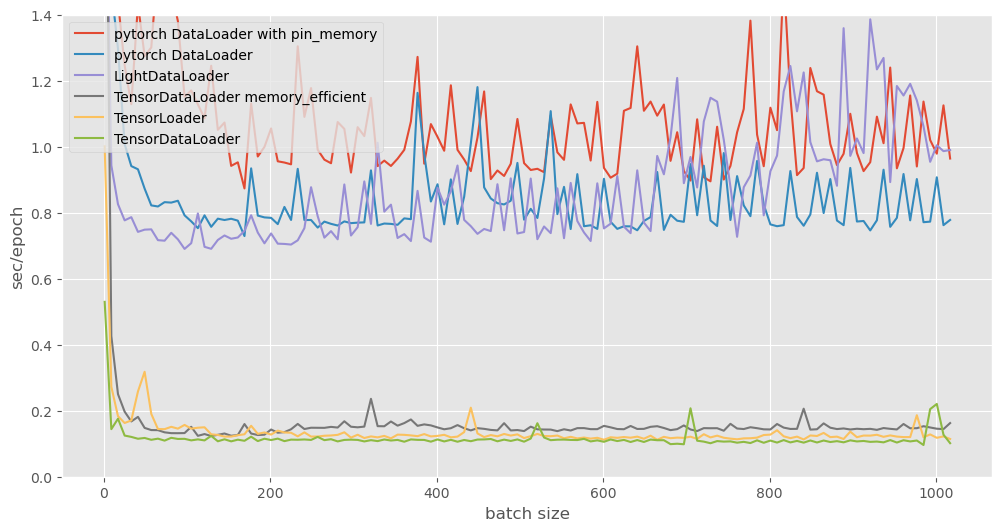

In [12]:
import numpy as np
plt.style.use('ggplot')
plt.tight_layout()

time_per_batch_size_t = sorted(time_per_batch_size.items(), key = lambda x: np.mean(list(x[1].values())), reverse = True)

for key, vals_dict in time_per_batch_size_t:
  plt.plot(list(vals_dict.keys()), list(vals_dict.values()), label = key)

plt.xlabel('batch size')
plt.ylabel('sec/epoch')
plt.ylim(0, 1.4)
plt.legend()
plt.gcf().set_size_inches(12, 6)
plt.show()

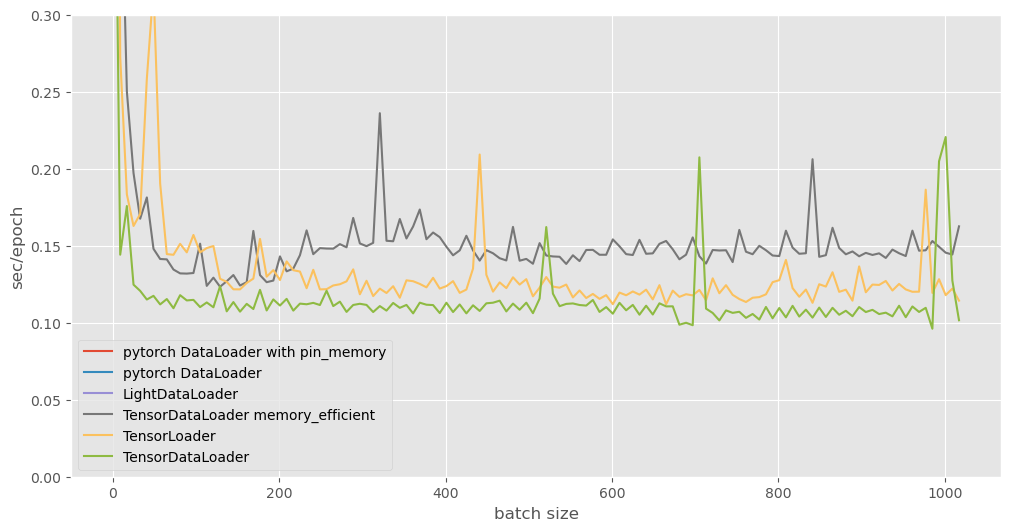

In [13]:
import numpy as np
plt.style.use('ggplot')
plt.tight_layout()

time_per_batch_size_t = sorted(time_per_batch_size.items(), key = lambda x: np.mean(list(x[1].values())), reverse = True)

for key, vals_dict in time_per_batch_size_t:
  plt.plot(list(vals_dict.keys()), list(vals_dict.values()), label = key)

plt.xlabel('batch size')
plt.ylabel('sec/epoch')
plt.ylim(0, 0.3)
plt.legend()
plt.gcf().set_size_inches(12, 6)
plt.show()

In [18]:
for key, vals_dict in time_per_batch_size_t:
    print(f'{key.ljust(40)} {np.sum(list(vals_dict.values()))} sec.')

pytorch DataLoader with pin_memory       146.8673715000623 sec.
pytorch DataLoader                       113.20603140027379 sec.
LightDataLoader                          112.37881010014098 sec.
TensorDataLoader memory_efficient        21.554916899913223 sec.
TensorLoader                             17.700561700039543 sec.
TensorDataLoader                         14.947468700091122 sec.
